## Trabalho 1 - Variáveis Aleatórias e Processos Estocásticos

### Importar e Instalar bibliotecas

In [ ]:
%pip install matplotlib
%pip install soundfile
%pip install sounddevice
%pip install scipy

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import sounddevice as sd
from scipy.stats import skew, kurtosis

### Funções Auxiliares

In [49]:
# Função para plotagem de gráficos
def plot_graph(
    x,
    y,
    title,
    xlabel,
    ylabel,
    y2=None,
    label=None,
    label2=None,
    color="blue",
    color2="red"
):

    plt.figure(figsize=(8, 4))

    plt.plot(x, y, label=label, color=color)
    if y2 is not None:
        plt.plot(x, y2, label=label2, color=color2)
   
    # Adicionar um título ao gráfico
    plt.title(title)
    # Adicionar rótulos aos eixos
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if label is not None:
        # Adicionar uma legenda
        plt.legend()

    plt.show()    

### Carregar o sinal de áudio

In [50]:
signal, sampling_rate = sf.read('botao.wav')

# Reproduzir o áudio
sd.play(signal, sampling_rate)

# Criando um vetor de tempo para o sinal
time = np.arange(len(signal)) / sampling_rate

### Plot do sinal áudio 

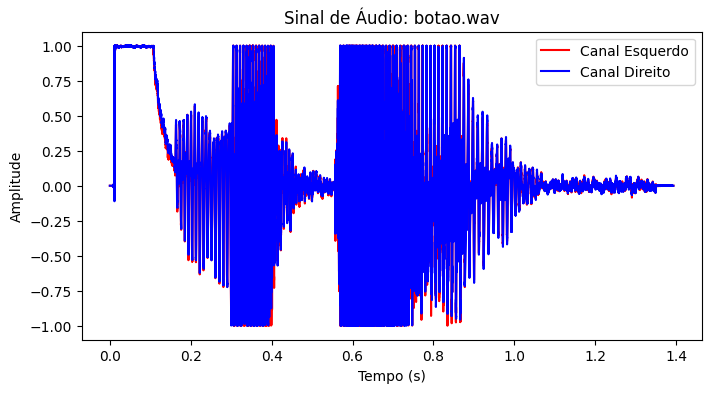

In [51]:
plot_graph(time, signal[:, 0], 'Sinal de Áudio: botao.wav', 'Tempo (s)', 
           'Amplitude', signal[:, 1], label='Canal Esquerdo', label2='Canal Direito', 
           color='r', color2='b')

### Gerar o histograma

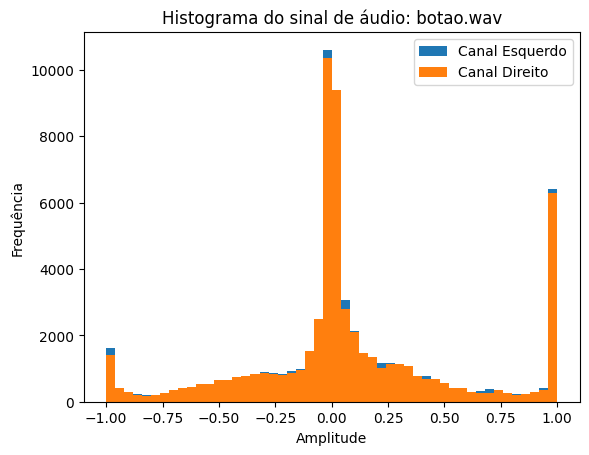

In [52]:
plt.hist(signal[:, 0], bins=50, label='Canal Esquerdo')
plt.hist(signal[:, 1], bins=50, label='Canal Direito')
plt.xlabel('Amplitude')
plt.ylabel('Frequência')
plt.title('Histograma do sinal de áudio: botao.wav')
plt.legend()
plt.show()


### Calcular a assimetria e a curtose do sinal de áudio

In [53]:
# Calcular a skewness
signal_skewness = skew(signal)

# Calcular a kurtosis
signal_kurtosis = kurtosis(signal)

# imprimir os valores de skewness e kurtosis
print("Assimetria:", signal_skewness)
print("Curtose:", signal_kurtosis)

'''
  Os valores de assimetria para o sinal de áudio são [0.23476657, 0.25803828]. Ambos os valores (canais estéreos)
  são positivos. Como esperado, confirma uma leve assimetria à direita na distribuição das amplitudes 
  do sinal de áudio, como é possível observar no gráfico de histograma.
  
  Já os valores de curtose para o sinal de áudio são [0.38622304 0.3599864].
  Ambos os valores são positivos, o que sugere uma curtose ligeiramente alta, 
  indicando uma distribuição com caudas um pouco mais pesadas do que a distribuição normal.
  É possível observar isso no gráfico de histograma, onde a distribuição das amplitudes do sinal de áudio
  é mais concentrada em torno da média, o que torna as caudas um pouco mais pesadas do que a distribuição normal.
'''

Assimetria: [0.23476657 0.25803828]
Curtose: [0.38622304 0.3599864 ]


'\n  Os valores de assimetria para o sinal de áudio são [0.23476657, 0.25803828]. Ambos os valores (canais estéreos)\n  são positivos. Como esperado, confirma uma leve assimetria à direita na distribuição das amplitudes \n  do sinal de áudio, como é possível observar no gráfico de histograma.\n  \n  Já os valores de curtose para o sinal de áudio são [0.38622304 0.3599864].\n  Ambos os valores são positivos, o que sugere uma curtose ligeiramente alta, \n  indicando uma distribuição com caudas um pouco mais pesadas do que a distribuição normal.\n  É possível observar isso no gráfico de histograma, onde a distribuição das amplitudes do sinal de áudio\n  é mais concentrada em torno da média, o que torna as caudas um pouco mais pesadas do que a distribuição normal.\n'

### Calcular a média temporal das partes do sinal (10 partes)

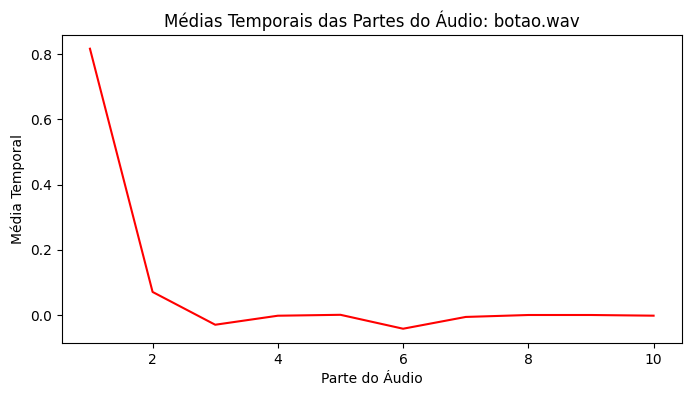

"\nA média temporal das partes do sinal não permanecem constantes. O que é esperado,\numa vez que é possível observar que o sinal sofre variações ao longo do tempo provenientes\nda entonação e pronúcia da palavra 'botão' falada no sinal de áudio.\n"

In [54]:
# Calcular o tamanho de cada parte que o sinal será dividido
part_size = len(signal) // 10

# Dividir o sinal nas 10 partes
signal_parts = [signal[i:i+part_size] for i in range(0, len(signal), part_size)]

# Calcular a média temporal de cada parte
mean_parts = [np.mean(part) for part in signal_parts]

# Plotar o gráfico da média temporal das partes
plot_graph(range(1, 11), mean_parts, 'Médias Temporais das Partes do Áudio: botao.wav', 'Parte do Áudio', 
           'Média Temporal', color='r')

'''
A média temporal das partes do sinal não permanecem constantes. O que é esperado,
uma vez que é possível observar que o sinal sofre variações ao longo do tempo provenientes
da entonação e pronúcia da palavra 'botão' falada no sinal de áudio.
'''


### Calcular a função de autocorrelação das partes do sinal

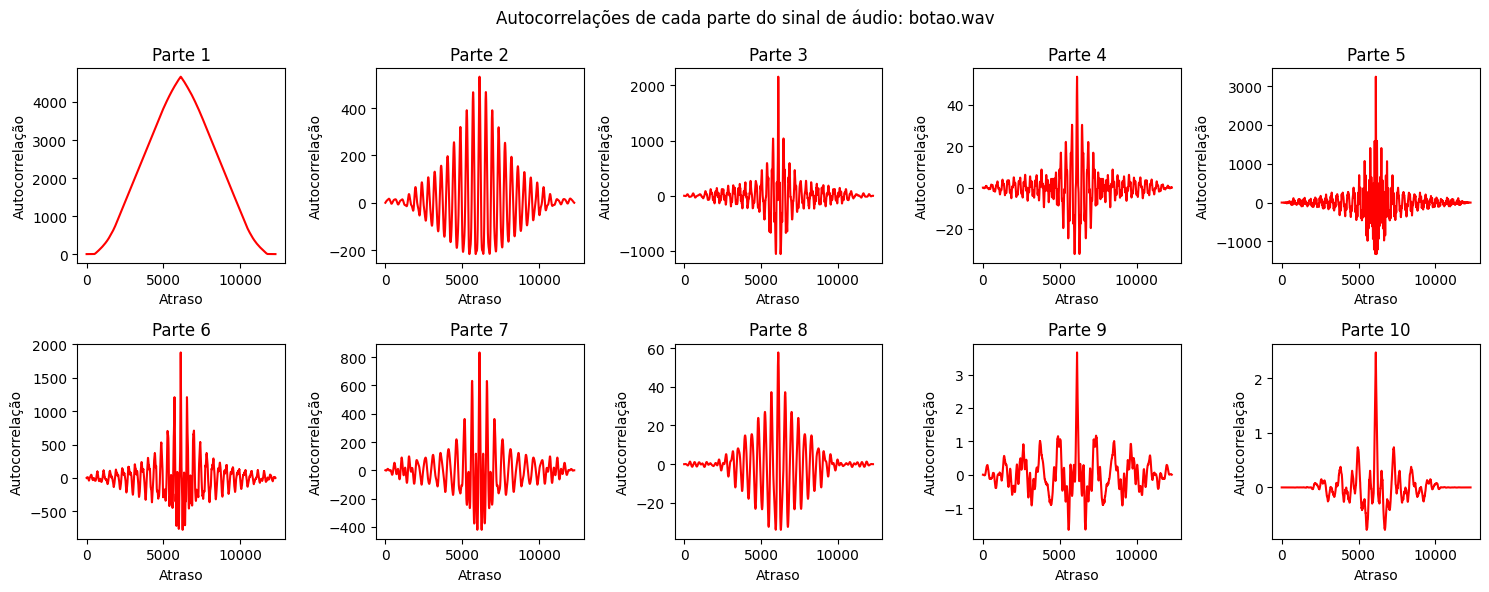

"\nAs autocorrelações de cada parte do sinal de áudio são diferentes. Isso é esperado,\numa vez que o sinal de áudio sofre variações ao longo do tempo provenientes\nda entonação e pronúcia da palavra 'botão' falada no sinal de áudio.\n\n"

In [55]:
autocorrelations = []
lags = 20


# Calcular a autocorrelação de cada parte do sinal
for part in signal_parts:
    autocorr_part = np.correlate(part[:, 0], np.roll(part[:, 0], lags), mode='full')
    autocorrelations.append(autocorr_part)


# Plotar as autocorrelações de cada parte do sinal
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autocorrelações de cada parte do sinal de áudio: botao.wav')

for i in range(len(autocorrelations)):
    row = i // 5
    col = i % 5
    axs[row, col].plot(range(len(autocorrelations[i])), autocorrelations[i], color='r')
    axs[row, col].set_title(f'Parte {i+1}')
    axs[row, col].set_xlabel('Atraso')
    axs[row, col].set_ylabel('Autocorrelação')

plt.tight_layout()
plt.show()
    

'''
As autocorrelações de cada parte do sinal de áudio são diferentes. Isso é esperado,
uma vez que o sinal de áudio sofre variações ao longo do tempo provenientes
da entonação e pronúcia da palavra 'botão' falada no sinal de áudio.

'''

### O sinal é estacionário no sentido amplo ?

Para que o sinal de áudio seja estacionário no sentido amplo, é preciso atender a duas características
- A sua média temporal (função de média) deve ser constante.
- A autocovariância não deve depender do tempo.

Dessa forma, **observa-se que o sinal botao.wav não entende a esses requisito**s, pois sua média temporal apresenta variação, bem como sua autocovariância em relação a cada uma das 10 partes do áudio.